## Dragon Real Estate - Price Predictor


In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,NaN,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,NaN,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,NaN,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,2.94,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2    INDUS    506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     502 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.697271,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.151585,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,7.037500,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,17.057500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN  '}>,
        <AxesSubplot:title={'center':' INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX '}>,
        <AxesSubplot:title={'center':'RM  '}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS '}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO '}>,
        <AxesSubplot:title={'center':'B '}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

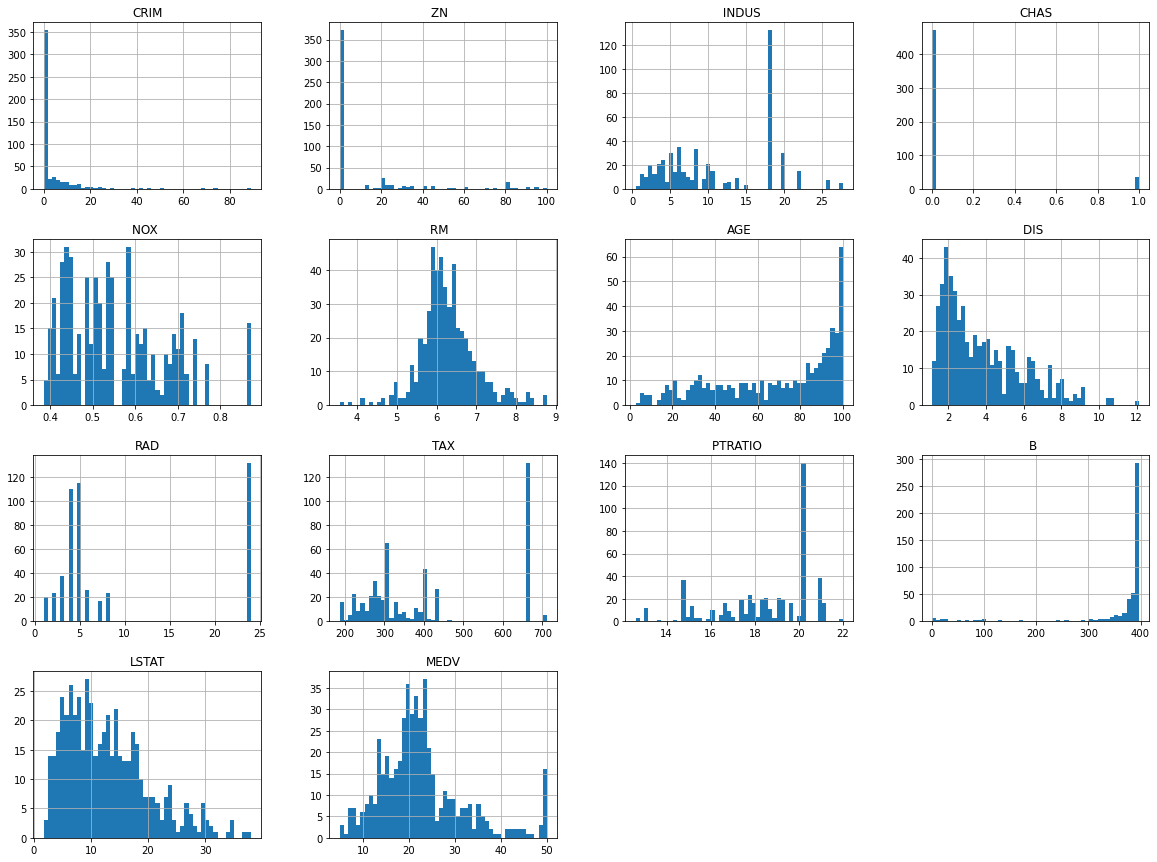

In [7]:
# For Plotting Histogram 
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize =(20,15))

# Train -Test Splitting

In [8]:
#for  Learning Purpose
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     train_indices =shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
# train_set, test_set =split_train_test(housing,0.2)

In [10]:
# print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")


In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")


Rows in train set : 404
Rows in test set : 102



In [12]:
# stratified sampling 
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
        strat_train_set =housing.loc[train_index]
        strat_test_set =housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
housing =strat_train_set.copy()

# Looking for Correlation

In [16]:
corr_matrix =housing.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.679894
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
 INDUS     -0.473516
PTRATIO    -0.493534
LSTAT      -0.740622
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

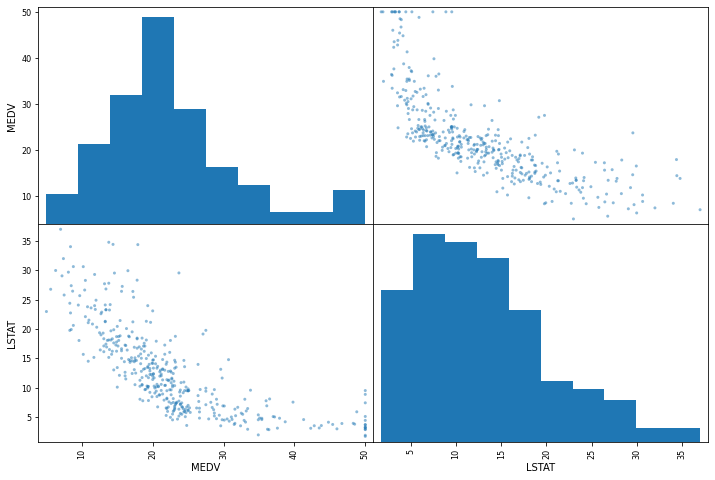

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "LSTAT"]
scatter_matrix(housing[attributes], figsize =(12,8))

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

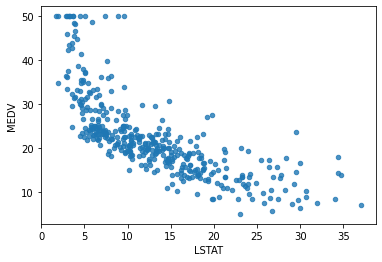

In [19]:
housing.plot(kind="scatter",x="LSTAT",y="MEDV",alpha =0.8)

# Trying out Attribute Combination

In [20]:
housing["TAXLSTAT"]=housing["TAX"]/housing["LSTAT"]

In [21]:
housing["TAXLSTAT"]

254    47.945205
348    46.744574
476    35.653105
321    41.775837
326    46.666667
         ...    
155    26.830892
423    28.595964
98     77.310924
455    36.734694
216    20.429312
Name: TAXLSTAT, Length: 404, dtype: float64

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXLSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,47.945205
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,46.744574
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,35.653105
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,41.775837
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,46.666667


In [23]:
corr_matrix =housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.679894
TAXLSTAT    0.624439
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
 INDUS     -0.473516
PTRATIO    -0.493534
LSTAT      -0.740622
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXLSTAT', ylabel='MEDV'>

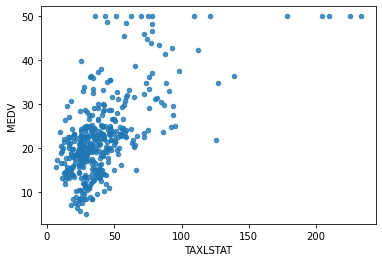

In [24]:
housing.plot(kind="scatter",x="TAXLSTAT",y="MEDV",alpha =0.8)

In [25]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels =strat_train_set["MEDV"].copy()

### Missing Attributes 

In [26]:
# To take care of missing attribbutes we can do the following
# 1.Get rid of the misssing data point
# 2.Get rid of the whole attributes
# 3.Set the value to some median/mean/0  

In [27]:
a =housing.dropna(subset=["LSTAT"]) #option 1
a.shape

(402, 13)

In [28]:
housing.drop("LSTAT",axis=1) #option 2
# note that there is not LSTAT Column and also know that the original
# data frame is unchanged 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92


In [29]:
median =housing["LSTAT"].median()

In [30]:
housing["LSTAT"].fillna(median) #option 3
# note that there is not LSTAT Column and also know that the original
# data frame is unchanged 

254     6.57
348     5.99
476    18.68
321     6.87
326     6.15
       ...  
155    15.02
423    23.29
98      3.57
455    18.13
216    13.51
Name: LSTAT, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe() #before we started filling missing Attributes 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,402.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.826891
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.237084
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.905000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.650000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.107500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.16500e+01])

In [35]:
X=imputer.transform(housing)

In [36]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.821064
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.219578
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.915000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.650000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit Learn Design 

In [38]:
# Primarily,three types of objects
# 1. Estimators eg. imputer, fit and tranformmethod
# 2. Transformers take input and returns output based on learning 
# 3. Predictors - linear regression model, fir predict are two common functions 

# Feature Scaling 


Primarily two types of feature scaling methods:
1. Min-max Scaling (Normalisation)
    (value-min)/(max-min)
    values 0 to 1
    sklearn provides class call MinMaxScaler for this
2. Standardised Scaling
    (value-mean)/std
    sklearn provided a class Called StandardScaler for this

# Creating a pipeline 


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [40]:
housing_num_tr =my_pipeline.fit_transform(housing_tr)

In [41]:
housing_num_tr.shape

(404, 13)

## Selecting a Desired Model for Dragon Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model =LinearRegression()
# model=DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [43]:
some_data =housing.iloc[:5]

In [44]:
some_labels =housing_labels.iloc[:5]

In [45]:
prepare_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepare_data)

array([22.442, 25.445, 16.676, 23.29 , 23.593])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse =mean_squared_error(housing_labels, housing_predictions)
rmse =np.sqrt(mse)

In [49]:
rmse

1.1700097972848655

# Using Better Evaluation Technique - Cross Validation

In [50]:
# 1 2 3 4 5 6 7 8 9 10 
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores =np.sqrt(-scores)

In [51]:
rmse_scores

array([2.86644026, 2.6049477 , 4.53032893, 2.67418705, 3.44182189,
       2.72699896, 4.81604002, 3.65156337, 3.32469739, 3.1402643 ])

In [52]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ",scores.mean())
    print("standard deviation:",scores.std())

In [53]:
print_scores(rmse_scores)

Scores: [2.86644026 2.6049477  4.53032893 2.67418705 3.44182189 2.72699896
 4.81604002 3.65156337 3.32469739 3.1402643 ]
Mean:  3.377728986171646
standard deviation: 0.7288722907476748


## After analysing the mean and sd from Decision Tree, Linear Regression, Random Forest Regression we can say that Random Forest Regression is producing the best values.

In [54]:
# from sklearn.externals import joblib

# Saving the model

In [55]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

# TESTING THE MODEL ON TEST DATA

In [56]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared =my_pipeline.transform(X_test)
final_predictions =model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
# final_rmse
print(final_predictions,list(Y_test))

[25.06  11.804 26.084 22.05  18.649 14.72  20.208 14.347 31.895 42.046
 19.866 11.575 22.846 31.576 19.485 10.883 32.025 14.455 23.506 18.905
 19.99  18.086 18.586 21.997 18.126 30.919 15.93  33.027  8.907 33.901
 24.018 21.524 22.679 11.281 21.067 10.786 43.806 24.177 23.118 42.661
 24.363 31.621 20.319 20.708 19.214 33.277 44.626 19.842 20.756 22.053
 21.202 14.54  21.351 14.656 25.003 32.837 42.438 28.659 20.408 20.819
 46.962  9.419 18.895 25.189 14.744 33.621 20.185 17.761 19.474 33.09
 26.672 22.93  21.156 22.598 34.621 13.555 15.749 20.008 20.604 21.255
 22.5   20.886 13.746 22.102 20.687 21.325 14.075 21.209 21.645 23.198
 18.964 27.774  6.974 26.696 19.169 29.303 19.916 31.34  13.939 26.208
 21.482 20.262] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

## Using the Model

In [57]:
# prepare_data[0]
from joblib import dump,load
import numpy as np
model=load('Dragon.joblib')
features = np.array([[-0.53942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86692262]])
model.predict(features)

array([22.561])